<a href="https://colab.research.google.com/github/RizqiRHuda/PVCK_Semester5/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MODUL 5 – Operasi Aritmatika dan Logika - Gamma Correction,Image Depth, PSNR, Average Denoising, Image Masking**

### Rizqi Rohmatul Huda
### TI - 3C / 21
### 2141720264

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


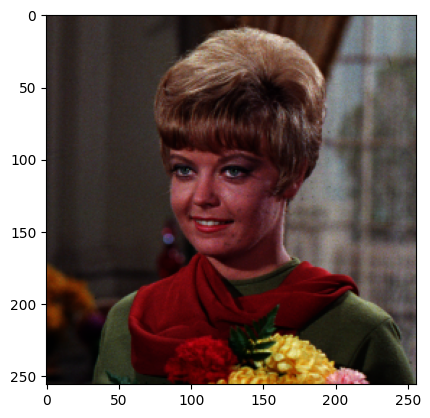

In [40]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/img_python/female.tiff')
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
plt.imshow(image)

### **Tugas Praktikum**

1. Buat Gamma Correction sesuai dengan petunjuk berikut
Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction Pada Citra
-------------------------------------------
Masukan nilai Gamma: 3


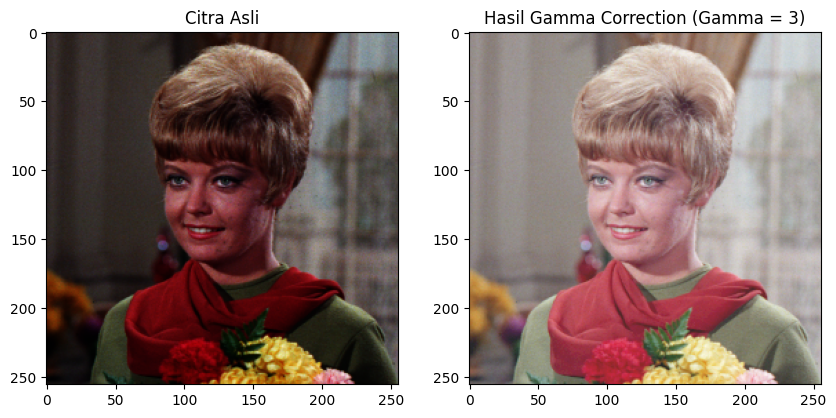

In [41]:
# nomor 1
import numpy as np
import matplotlib.pyplot as plt


print(' Gamma Correction Pada Citra')
print('-------------------------------------------')
try:
  gamma = int(input('Masukan nilai Gamma: '))

  # gamma correction pada citra
  gamma_img = np.power(image/255.0, 1/gamma)*255
  gamma_img = np.uint8(gamma_img)

  # Menampilkan citra asli dan citra hasil Gamma Correction
  plt.figure(figsize=(10, 5))

  plt.subplot(1, 2, 1)
  plt.imshow(image)
  plt.title('Citra Asli')

  plt.subplot(1, 2, 2)
  plt.imshow(gamma_img)
  plt.title('Hasil Gamma Correction (Gamma = ' + str(gamma) + ')')

  plt.show()

except ValueError:
  print('Error, not a number')



2. Buat Simulasi Image Depth
Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit.

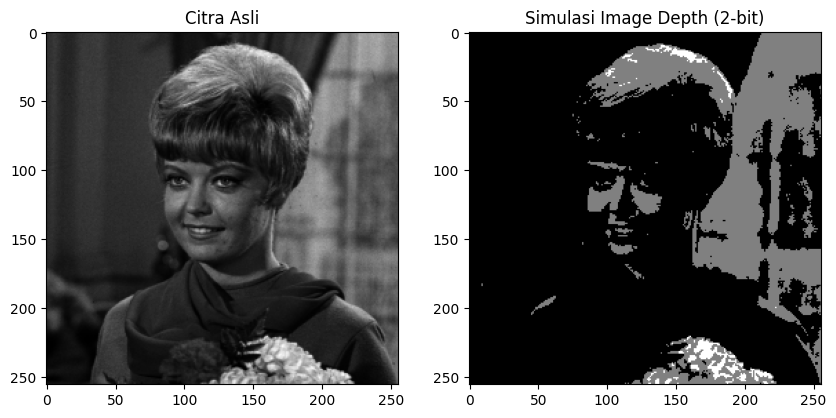

In [46]:
# nomor 2

def simulasi_bit_depth(original, bit_depth):
    levels = 2 ** bit_depth
    level_interval = 255 / (levels - 1)

    # Kuantisasi: Ubah setiap piksel ke level yang sesuai
    depth_image = (original / level_interval).astype(np.uint8) * level_interval
    return depth_image

bit_depth = 2
# rumus bit_depth
level = 255 / (pow(2, bit_depth)-1)
original = cv.imread('/content/drive/MyDrive/img_python/female.tiff', cv.IMREAD_GRAYSCALE)

# Membuat citra kedalaman (simulasi Image Depth)
depth_image = (original / level).astype(np.uint8) * level

# Menampilkan citra asli dan citra dengan simulasi Image Depth
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title('Citra Asli')


plt.subplot(1, 2, 2)
plt.imshow(depth_image, cmap='gray')
plt.title('Simulasi Image Depth ({}-bit)'.format(bit_depth))
plt.show()


3. Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya.

In [65]:
# nomor 3
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/img_python/galaxy.jpg')
original = cv.resize(img,(0,0), fx=0.2, fy=0.2)

cv_img = []
for img in glob.glob('/content/drive/MyDrive/img_python/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

dst = cv_img[]
noise_number = 4
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):
      return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr,'(dB)')
final_frame = cv.hconcat((original, dst))
cv2_imshow(final_frame)


IndexError: ignored

4. . Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:


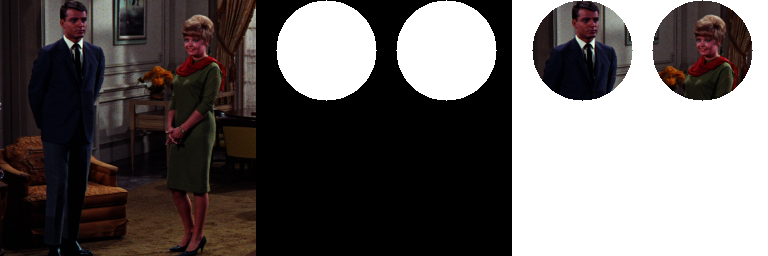

In [59]:
couple = cv.imread('/content/drive/MyDrive/img_python/couple.tiff')
img_mask = np.zeros(couple.shape, dtype=np.uint8)
img_mask = cv.circle(img_mask, (70, 50), 50, (255,255,255), -1)

img_mask2 = np.zeros(couple.shape, dtype=np.uint8)
img_mask2 = cv.circle(img_mask, (190, 50), 50, (255,255,255), -1)

hasil = couple & img_mask & img_mask2
hasil = cv.bitwise_and(couple, img_mask)

hasil[img_mask==0] = 255

final_frame = cv.hconcat((couple,img_mask,hasil))
cv2_imshow(final_frame)


5.  Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu